# Data Visualize Part 2: Preprocessing

---

## Import các thư viện cần thiết

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
sns.set()
plt.rcParams["figure.figsize"] = (10,8)

---

## Thu thập dữ liệu

Trong bài này, ta sẽ dùng dữ liệu đã được thu thập bằng Selenium là file "data.csv" đính kèm; đây là dữ liệu về thông số ca nhiễm Covid19 của Thế giới. Dữ liệu này được lấy từ Dữ liệu thống kê từng ngày ca nhiễm virus Covid-19 từ tổ chức Worldometer, và gốc của dữ liệu là [ở đây](https://www.worldometers.info/).


---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [221]:
data_df = pd.read_csv('data.csv')
data_df.head()

,Unnamed: 0,Country,Total Cases,Total Death,Total Recovered,Active Cases,Serious Critical,Tot cases/1M pop,Deaths/1M pop,Total tests,Tests/ 1M pop,region,population,1 Case every X ppl,1 death every X ppl,1 Test every X ppl
0,0,USA,"82,192,880","1,014,114","80,052,061","1,126,705","1,559","245,753","3,032","993,285,213","2,969,875",North America,"334,453,530",4,330,0.000
1,1,India,"43,039,023","521,767","42,506,228","11,028",698,"30,652",372,"794,525,202","565,851",Asia,"1,404,124,784",33,"2,691",2.000
2,2,France,"27,310,055","143,777","24,492,534","2,673,744","1,541","416,755","2,194","260,504,402","3,975,327",Europe,"65,530,304",2,456,0.000
3,3,UK,"21,715,116","171,045","19,973,929","1,570,142",385,"316,916","2,496","511,698,520","7,467,868",Europe,"68,520,023",3,401,0.000
4,4,S. Korea,"15,979,061","20,352",NaN,NaN,962,"311,194",396,"15,804,065","307,786",Asia,"51,347,631",3,"2,523",3.000


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [222]:
num_rows = data_df.shape[0]
num_cols = data_df.shape[1]
print(num_rows, num_cols)

342 16


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu của "Covid19" và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin của thông số ca nhiễm. Có vẻ không có dòng nào bị "lạc loài".

Ta thấy ở cột ``Unnamed: 0`` chỉ là index của file ``data.csv`` không có tác dụng trong việc Visualize nên ta sẽ bỏ cột này.

In [223]:
data_df = data_df.drop('Unnamed: 0', axis = 1)
data_df.reset_index()
data_df

,Country,Total Cases,Total Death,Total Recovered,Active Cases,Serious Critical,Tot cases/1M pop,Deaths/1M pop,Total tests,Tests/ 1M pop,region,population,1 Case every X ppl,1 death every X ppl,1 Test every X ppl
0,USA,"82,192,880","1,014,114","80,052,061","1,126,705","1,559","245,753","3,032","993,285,213","2,969,875",North America,"334,453,530",4,330,0.000
1,India,"43,039,023","521,767","42,506,228","11,028",698,"30,652",372,"794,525,202","565,851",Asia,"1,404,124,784",33,"2,691",2.000
2,France,"27,310,055","143,777","24,492,534","2,673,744","1,541","416,755","2,194","260,504,402","3,975,327",Europe,"65,530,304",2,456,0.000
3,UK,"21,715,116","171,045","19,973,929","1,570,142",385,"316,916","2,496","511,698,520","7,467,868",Europe,"68,520,023",3,401,0.000
4,S. Korea,"15,979,061","20,352",NaN,NaN,962,"311,194",396,"15,804,065","307,786",Asia,"51,347,631",3,"2,523",3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Falkland Islands,128,,NaN,NaN,NaN,"34,973",NaN,"8,632","2,358,470",South America,"3,660",29,NaN,0.000
338,Vatican City,29,,29,0,NaN,"36,025",NaN,NaN,NaN,Europe,805,28,NaN,NaN
339,MS Zaandam,9,2,7,0,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
340,Niue,7,,7,0,NaN,"4,253",NaN,NaN,NaN,Australia/Oceania,"1,646",235,NaN,NaN


### Dữ liệu có bị thiếu không?

In [224]:
data_df.isnull().sum()

Country                  0
Total Cases              0
Total Death              0
Total Recovered         21
Active Cases            21
Serious Critical       108
Tot cases/1M pop         3
Deaths/1M pop           18
Total tests             24
Tests/ 1M pop           24
region                   3
population               0
1 Case every X ppl       3
1 death every X ppl     18
1 Test every X ppl      24
dtype: int64

Như ta đã thấy dữ liệu bị thiếu đều nằm ở các cột có dạng **số**, do dữ liệu này ta chỉ mới đọc lên, **chưa xác định được kiểu dữ liệu của từng cột** nên ta sẽ xử lý các "missing value" này sau khi ta đã xác định rõ kiểu dữ liệu của từng cột.

### Dữ liệu có các dòng bị lặp không?

In [187]:
if (data_df.duplicated().any() == True):
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
    
have_duplicated_rows

True

Ở kết quả trên là "True" tức là có các dòng bị lặp, ta không muốn dữ liệu của mình bị lệch quá nhiều dẫn đến Visualize không đúng, ta sẽ xoá các dòng dữ liệu bị lặp đó đi.

In [225]:
data_df.drop_duplicates()

,Country,Total Cases,Total Death,Total Recovered,Active Cases,Serious Critical,Tot cases/1M pop,Deaths/1M pop,Total tests,Tests/ 1M pop,region,population,1 Case every X ppl,1 death every X ppl,1 Test every X ppl
0,USA,"82,192,880","1,014,114","80,052,061","1,126,705","1,559","245,753","3,032","993,285,213","2,969,875",North America,"334,453,530",4,330,0.000
1,India,"43,039,023","521,767","42,506,228","11,028",698,"30,652",372,"794,525,202","565,851",Asia,"1,404,124,784",33,"2,691",2.000
2,France,"27,310,055","143,777","24,492,534","2,673,744","1,541","416,755","2,194","260,504,402","3,975,327",Europe,"65,530,304",2,456,0.000
3,UK,"21,715,116","171,045","19,973,929","1,570,142",385,"316,916","2,496","511,698,520","7,467,868",Europe,"68,520,023",3,401,0.000
4,S. Korea,"15,979,061","20,352",NaN,NaN,962,"311,194",396,"15,804,065","307,786",Asia,"51,347,631",3,"2,523",3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Sint Maarten,"9,888",86,"9,734",68,10,"226,058","1,966","62,056","1,418,715",North America,"43,741",4,509,1.000
325,Caribbean Netherlands,"9,341",34,"8,987",320,NaN,"350,428","1,276","30,126","1,130,177",North America,"26,656",3,784,1.000
326,Tonga,"8,559",11,"6,772","1,776",NaN,"79,379",102,"304,785","2,826,664",Australia/Oceania,"107,825",13,"9,802",0.000
331,Turks and Caicos,"5,923",36,"5,859",28,4,"149,390",908,"447,713","11,292,196",North America,"39,648",7,"1,101",0.000


### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của dataset "Covid19 Cases" về các cột trong file "data.csv":
- **Country**: Tên quốc gia.
- **Total Cases**: Tổng số ca nhiễm.
- **Total Death**: Tổng số ca tử vong.
- **Total Recovered**: Tổng số ca phục hồi.
- **Active Cases**: Số ca dương tính.
- **Serious Critical**: Ca diễn biến nặng
- **Tot cases/1M pop**: Tổng số ca tính trên 1 triệu dân số
- **Deaths/1M pop**: Tổng số ca chết trên 1 triệu dân số
- **Total tests**: Tổng số lần Test
- **Tests/ 1M pop**: Số lần test trên 1 triệu dân số
- **region**: Khu vực
- **population**: Dân số
- **1 Case every X ppl**: 1 ca trong dân số
- **1 death every X ppl**: 1 ca tử vong trong dân số
- **1 Test every X ppl**: 1 test trong dân số


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không? 

In [226]:
col_dtypes = data_df.dtypes
col_dtypes

Country                 object
Total Cases             object
Total Death             object
Total Recovered         object
Active Cases            object
Serious Critical        object
Tot cases/1M pop        object
Deaths/1M pop           object
Total tests             object
Tests/ 1M pop           object
region                  object
population              object
1 Case every X ppl      object
1 death every X ppl     object
1 Test every X ppl     float64
dtype: object

In [190]:
# XỬ lý
def open_object_dtype(s):
    dtypes = set()
    
    dtypes = set((s.apply(value_type)))
    
    return dtypes

def value_type(value):
    return (type(value))

In [227]:
print('Country=', open_object_dtype(data_df['Country']))
print('Total Death=', open_object_dtype(data_df['Total Death']))
print('Total Recovered=', open_object_dtype(data_df['Total Recovered']))
print('Total Cases=', open_object_dtype(data_df['Total Cases']))
print('Active Cases=', open_object_dtype(data_df['Active Cases']))
print('Serious Critical=', open_object_dtype(data_df['Serious Critical']))
print('Tot cases/1M pop=', open_object_dtype(data_df['Tot cases/1M pop']))
print('Deaths/1M pop=', open_object_dtype(data_df['Deaths/1M pop']))
print('Total tests=', open_object_dtype(data_df['Total tests']))
print('Tests/ 1M pop=', open_object_dtype(data_df['Tests/ 1M pop']))
print('region=', open_object_dtype(data_df['region']))
print('population=', open_object_dtype(data_df['population']))
print('1 Case every X ppl=', open_object_dtype(data_df['1 Case every X ppl']))
print('1 death every X ppl=', open_object_dtype(data_df['1 death every X ppl']))

Country= {<class 'str'>}
Total Death= {<class 'str'>}
Total Recovered= {<class 'str'>, <class 'float'>}
Total Cases= {<class 'str'>}
Active Cases= {<class 'str'>, <class 'float'>}
Serious Critical= {<class 'str'>, <class 'float'>}
Tot cases/1M pop= {<class 'str'>, <class 'float'>}
Deaths/1M pop= {<class 'str'>, <class 'float'>}
Total tests= {<class 'str'>, <class 'float'>}
Tests/ 1M pop= {<class 'str'>, <class 'float'>}
region= {<class 'str'>, <class 'float'>}
population= {<class 'str'>}
1 Case every X ppl= {<class 'str'>, <class 'float'>}
1 death every X ppl= {<class 'str'>, <class 'float'>}


Nhận xét:
- Các cột dạng số nhưng lại có thêm kiểu ``str`` do có giá trị nan, ta sẽ chuyển kiểu dữ liệu sang ``float64``
- Các cột dạng định danh ta cần chuyển chúng sang kiểu sữ liệu ``str``

## Tiền xử lý

### Xác định kiểu dữ liệu của từng cột:

1. Với 2 cột dạng Categorical là ``Country`` và ``region`` ta sẽ chuyển kiểu dữ liệu của 2 cột này sang dạng `str`
2. Với cột region có 3 giá trị null nên ta chỉ cần drop 3 dòng này

In [234]:
data_df['Country'] = data_df['Country'].astype(str)
data_df.dropna(axis=0, subset=["region"], inplace=True)
data_df.dtypes

Country                 object
Total Cases            float64
Total Death            float64
Total Recovered        float64
Active Cases           float64
Serious Critical       float64
Tot cases/1M pop       float64
Deaths/1M pop          float64
Total tests            float64
Tests/ 1M pop          float64
region                  object
population             float64
1 Case every X ppl     float64
1 death every X ppl    float64
1 Test every X ppl     float64
dtype: object

2. Với các cột còn lại là dạng Numeric, ta sẽ chuyển chúng sang dạng ``float64``:

Do các cột dạng Numberic này có số phần nghìn, phần trăm cách nhau bởi **dấu phẩy** nên pandas sẽ không nhận diện được kiểu dữ liệu số nên ta sẽ remove chúng. Ta cần lưu ý là với các dữ liệu là '' thì sẽ không thể thay đổi kiểu dữ liệu được nên ta sẽ replace chúng bằng giá trị NaN của numpy trước.


In [235]:
data_df_cp = data_df.copy()
data_df_cp = data_df_cp.replace(" ", np.nan)

def delete_comma(string):
    if (isinstance(string, str) and ',' in string):
        return string.replace(",", "")
    else:
        return string

data_df_cp["Total Cases"] = data_df_cp["Total Cases"].apply(delete_comma).astype(float)
data_df_cp["Total Death"] = data_df_cp["Total Death"].apply(delete_comma).astype(float)
data_df_cp["Total Recovered"] = data_df_cp["Total Recovered"].apply(delete_comma).astype(float)
data_df_cp["Active Cases"] = data_df_cp["Active Cases"].apply(delete_comma).astype(float)
data_df_cp["Serious Critical"] = data_df_cp["Serious Critical"].apply(delete_comma).astype(float)
data_df_cp["Tot cases/1M pop"] = data_df_cp["Tot cases/1M pop"].apply(delete_comma).astype(float)
data_df_cp["Deaths/1M pop"] = data_df_cp["Deaths/1M pop"].apply(delete_comma).astype(float)
data_df_cp["Total tests"] = data_df_cp["Total tests"].apply(delete_comma).astype(float)
data_df_cp["Tests/ 1M pop"] = data_df_cp["Tests/ 1M pop"].apply(delete_comma).astype(float)
data_df_cp["population"] = data_df_cp["population"].apply(delete_comma).astype(float)
data_df_cp["1 Case every X ppl"] = data_df_cp["1 Case every X ppl"].apply(delete_comma).astype(float)
data_df_cp["1 death every X ppl"] = data_df_cp["1 death every X ppl"].apply(delete_comma).astype(float)

data_df = data_df_cp
data_df.dtypes

Country                 object
Total Cases            float64
Total Death            float64
Total Recovered        float64
Active Cases           float64
Serious Critical       float64
Tot cases/1M pop       float64
Deaths/1M pop          float64
Total tests            float64
Tests/ 1M pop          float64
region                  object
population             float64
1 Case every X ppl     float64
1 death every X ppl    float64
1 Test every X ppl     float64
dtype: object

### Xử lý dữ liệu có chứa NaN:

Như ở trên, 
- Các cột categorical không có missing value
- Ta sẽ xử lý missing value ở các cột dạng Numeric (trừ cột ``Total Cases`` do không có missing value) bằng cách thay thế chúng bằng giá trị **trung bình (mean) của cột đó**.

In [238]:
data_df_cp = data_df.copy()

# Fill cột Numeric
data_df_cp["Total Death"] = data_df_cp["Total Death"].fillna(data_df_cp["Total Death"].mean())
data_df_cp["Total Recovered"] = data_df_cp["Total Recovered"].fillna(data_df_cp["Total Recovered"].mean())
data_df_cp["Active Cases"] = data_df_cp["Active Cases"].fillna(data_df_cp["Active Cases"].mean())
data_df_cp["Serious Critical"] = data_df_cp["Serious Critical"].fillna(data_df_cp["Serious Critical"].mean())
data_df_cp["Tot cases/1M pop"] = data_df_cp["Tot cases/1M pop"].fillna(data_df_cp["Tot cases/1M pop"].mean())
data_df_cp["Deaths/1M pop"] = data_df_cp["Deaths/1M pop"].fillna(data_df_cp["Deaths/1M pop"].mean())
data_df_cp["Total tests"] = data_df_cp["Total tests"].fillna(data_df_cp["Total Death"].mean())
data_df_cp["Tests/ 1M pop"] = data_df_cp["Tests/ 1M pop"].fillna(data_df_cp["Tests/ 1M pop"].mean())
data_df_cp["population"] = data_df_cp["population"].fillna(data_df_cp["population"].mean())
data_df_cp["1 Case every X ppl"] = data_df_cp["1 Case every X ppl"].fillna(data_df_cp["1 Case every X ppl"].mean())
data_df_cp["1 death every X ppl"] = data_df_cp["1 death every X ppl"].fillna(data_df_cp["1 death every X ppl"].mean())
data_df_cp["1 Test every X ppl"] = data_df_cp["1 Test every X ppl"].fillna(data_df_cp["1 Test every X ppl"].mean())

data_df = data_df_cp
data_df.to_csv("data_df_preprocessing.csv")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_df.isnull().sum()

Country                0
Total Cases            0
Total Death            0
Total Recovered        0
Active Cases           0
Serious Critical       0
Tot cases/1M pop       0
Deaths/1M pop          0
Total tests            0
Tests/ 1M pop          0
region                 0
population             0
1 Case every X ppl     0
1 death every X ppl    0
1 Test every X ppl     0
dtype: int64

---

# Part 3: Data exploratory

---

### Lấy ra các cột numerical

In [197]:
cols = data_df.columns.tolist()
cols.remove("Country")
cols.remove("region")
nume_cols = cols

In [198]:
nume_df = data_df[nume_cols]

In [239]:
nume_df

,Total Cases,Total Death,Total Recovered,Active Cases,Serious Critical,Tot cases/1M pop,Deaths/1M pop,Total tests,Tests/ 1M pop,population,1 Case every X ppl,1 death every X ppl,1 Test every X ppl
0,82192880.000,1014114.000,80052061.000,1126705.000,1559.000,245753.000,3032.000,993285213.000,2969875.000,334453530.000,4.000,330.000,0.000
1,43039023.000,521767.000,42506228.000,11028.000,698.000,30652.000,372.000,794525202.000,565851.000,1404124784.000,33.000,2691.000,2.000
2,27310055.000,143777.000,24492534.000,2673744.000,1541.000,416755.000,2194.000,260504402.000,3975327.000,65530304.000,2.000,456.000,0.000
3,21715116.000,171045.000,19973929.000,1570142.000,385.000,316916.000,2496.000,511698520.000,7467868.000,68520023.000,3.000,401.000,0.000
4,15979061.000,20352.000,2545376.844,88865.277,962.000,311194.000,396.000,15804065.000,307786.000,51347631.000,3.000,2523.000,3.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,128.000,32658.223,2545376.844,88865.277,293.013,34973.000,1230.253,8632.000,2358470.000,3660.000,29.000,8218.164,0.000
338,29.000,32658.223,29.000,0.000,293.013,36025.000,1230.253,32658.223,2131213.887,805.000,28.000,8218.164,9.406
339,9.000,2.000,7.000,0.000,293.013,158366.445,1230.253,32658.223,2131213.887,36234917.327,141.661,8218.164,9.406
340,7.000,32658.223,7.000,0.000,293.013,4253.000,1230.253,32658.223,2131213.887,1646.000,235.000,8218.164,9.406


### Correlation matrix

In [199]:
corr = nume_df.corr()
corr

,Total Cases,Total Death,Total Recovered,Active Cases,Serious Critical,Tot cases/1M pop,Deaths/1M pop,Total tests,Tests/ 1M pop,population,1 Case every X ppl,1 death every X ppl,1 Test every X ppl
Total Cases,1.000,0.942,0.989,0.582,0.366,0.108,0.183,0.926,0.064,0.595,-0.089,-0.115,-0.109
Total Death,0.942,1.000,0.952,0.441,0.505,0.011,0.205,0.873,0.007,0.618,-0.065,-0.110,-0.095
Total Recovered,0.989,0.952,1.000,0.567,0.346,0.088,0.188,0.935,0.071,0.607,-0.076,-0.101,-0.106
Active Cases,0.582,0.441,0.567,1.000,0.335,0.239,0.229,0.538,0.170,0.100,-0.076,-0.101,-0.104
Serious Critical,0.366,0.505,0.346,0.335,1.000,-0.142,0.047,0.269,-0.110,0.288,-0.032,-0.101,0.002
Tot cases/1M pop,0.108,0.011,0.088,0.239,-0.142,1.000,0.542,0.079,0.517,-0.138,-0.326,-0.385,-0.398
Deaths/1M pop,0.183,0.205,0.188,0.229,0.047,0.542,1.000,0.152,0.194,-0.083,-0.261,-0.427,-0.376
Total tests,0.926,0.873,0.935,0.538,0.269,0.079,0.152,1.000,0.192,0.671,-0.083,-0.105,-0.107
Tests/ 1M pop,0.064,0.007,0.071,0.170,-0.110,0.517,0.194,0.192,1.000,-0.095,-0.147,-0.200,-0.284
population,0.595,0.618,0.607,0.100,0.288,-0.138,-0.083,0.671,-0.095,1.000,0.010,0.026,0.015


<AxesSubplot:>

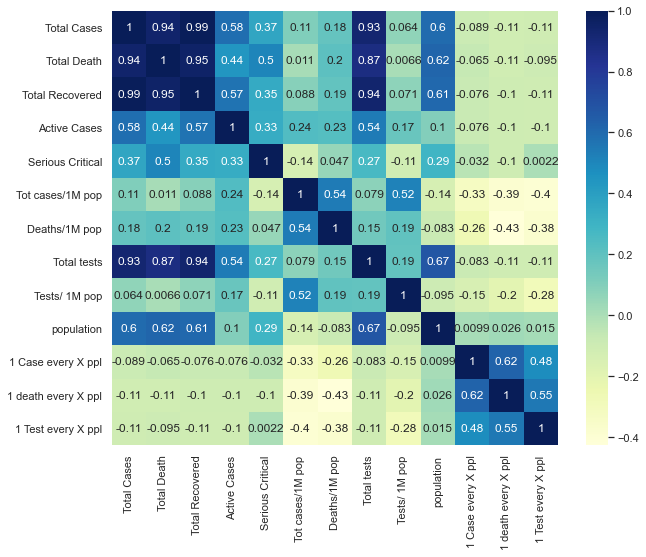

In [240]:
# Truc quan correlation matrix 
sns.heatmap(corr, annot=True, cmap="YlGnBu")

**Dựa trên biểu đồ heatmap trên có thể thấy các cặp thuộc tính tương quan mạnh (correlation coefficent>0.7):**
- Total Cases ~ Total Recovered
- Total Cases ~ Total Death
- Total Case ~ Total tests
- Total tests ~ Total Death
- Total Recovered ~ Total tests
-Có 4 biến numerical có mốt quan hệ tương quan với nhau

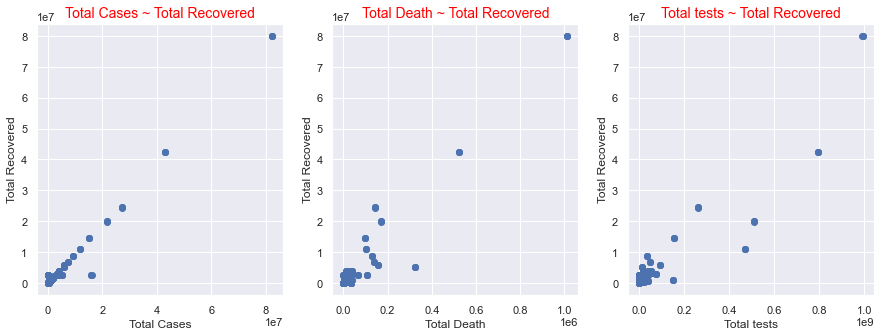

In [201]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(nume_df["Total Cases"],nume_df["Total Recovered"])
plt.xlabel("Total Cases")
plt.ylabel("Total Recovered")
plt.title("Total Cases ~ Total Recovered",fontdict={'color':'red','fontsize':14})
plt.subplot(1,3,2)
plt.scatter(nume_df["Total Death"],nume_df["Total Recovered"])
plt.xlabel("Total Death")
plt.ylabel("Total Recovered")
plt.title("Total Death ~ Total Recovered",fontdict={'color':"red",'fontsize':14})
plt.subplot(1,3,3)
plt.scatter(nume_df["Total tests"],nume_df["Total Recovered"])
plt.xlabel("Total tests")
plt.ylabel("Total Recovered")
plt.title("Total tests ~ Total Recovered",fontdict={'color':"red",'fontsize':14})
plt.show()

**Xét mối tương quan giữa Total Recovered ~ Total Cases, Total Death, Total tests**
- Ta đề xuất một mô hình hồi quy tuyến tính : **Total Recovered  ~ w0 + w1*Total Cases + w2*Total Death + w3*Total tests**

In [202]:
ols = sm.OLS(nume_df["Total Recovered"], sm.add_constant(nume_df[["Total Cases","Total Death","Total tests"]]))

In [203]:
reg = ols.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total Recovered   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     7346.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          2.74e-307
Time:                        13:45:47   Log-Likelihood:                -5243.2
No. Observations:                 342   AIC:                         1.049e+04
Df Residuals:                     338   BIC:                         1.051e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.374e+04   6.24e+04     -1.021      0.308   -1.87e+05    5.91e+04
Total Cases     0.6652      0.025     27.053      0.000       0.617       0.714
Total Death    14.3716      1.581      9.092      0.000      11.262      17.481
Total tests     0.0089      0.001      7.648      0.000       0.007       0.011
==============================================================================
Omnibus:                      319.986   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12313.553
Skew:                          -3.753   Prob(JB):                         0.00
Kurtosis:                      31.421   Cond. No.                     1.47e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Nhận xét:
* Mô hình hồi quy cho kết quả rất tốt (R-squared=0.985)
* Các biến độc lập đều có p-value thấp => có ý nghĩa thống kê
* Biến const không có ý nghĩa thông kê
* Ta thấy hệ số của "Total tests" khá nhỏ
* Các giá trị của các cột đều lớn hơn >e+6 nên ta sẽ lấy log các giá trị 

**Bây giờ, thử bỏ đi "Total tests", const trong tập các biến phụ thuộc, đồng thời lấy log10 các giá trị xem có thể tăng độ đo Rsquared hay không?**

In [204]:
ols = sm.OLS(np.log10(nume_df["Total Recovered"]), np.log10(nume_df[["Total Cases","Total Death"]]))

In [205]:
reg = ols.fit()

In [206]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Total Recovered   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.204e+04
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                   2.57e-316
Time:                        13:45:47   Log-Likelihood:                         -325.27
No. Observations:                 342   AIC:                                      654.5
Df Residuals:                     340   BIC:                                      662.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Total Cases     0.8837      0.024     37.359      0.000       0.837       0.930
Total Death     0.1653      0.036      4.647      0.000       0.095       0.235
==============================================================================
Omnibus:                      192.263   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5086.185
Skew:                           1.783   Prob(JB):                         0.00
Kurtosis:                      21.553   Cond. No.                         7.92
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Nhận xét:
* Giá trị Rsquared đã được cải thiện không nhiều
* Do đó có thể thấy rằng 2 biến: ["Total Death", "Total Cases"] ảnh hưởng nhiều lên thuộc tính "Total Recovered"
* Mô hình được chọn lúc này là: **log10(Total Recovered)  ~ w_1*log10(Total Cases) + w_2*log10(Total Death)**

## Ứng dụng thử các mô hình máy học

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE

In [208]:
df = nume_df[["Total Cases", "Total Death", "Total Recovered"]]
df

,Total Cases,Total Death,Total Recovered
0,82192880.000,1014114.000,80052061.000
1,43039023.000,521767.000,42506228.000
2,27310055.000,143777.000,24492534.000
3,21715116.000,171045.000,19973929.000
4,15979061.000,20352.000,2545376.844
...,...,...,...
337,128.000,32658.223,2545376.844
338,29.000,32658.223,29.000
339,9.000,2.000,7.000
340,7.000,32658.223,7.000


In [209]:
X = df[["Total Cases","Total Death"]].values
y = df["Total Recovered"].values

In [210]:
# Tach ra thanh tap training va test
X_train, X_test, y_train,y_test = train_test_split(np.log10(X), np.log10(y), test_size=0.3, random_state=42)

In [211]:
# khoi tao mo hinh linear regression
reg = LinearRegression(fit_intercept=False)

In [212]:
reg.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [213]:
# cac he so [w1,w2].T
reg.coef_

array([0.98081227, 0.01368925])

In [214]:
# Du doan tren tap test
y_pred = reg.predict(X_test)

In [215]:
# Do loi MSE tren tap test
mean_squared_error(y_test,y_pred,squared=False)

0.8814595763032486

**Kiểm tra độ đo MSE trên tập test và kết quả dự đoán  ta thấy kết quả MSE nhỏ. Nên mô hình được đề xuất hoạt động tốt**

## Dùng tSNE để trực quan dữ liệu

In [216]:
tsne = TSNE(n_components=1)

In [217]:
X_transformed = tsne.fit_transform(np.log10(X))
X_transformed

array([[-34.97194   ],
       [-34.58911   ],
       [-33.49149   ],
       [-33.337708  ],
       [-27.349863  ],
       [-32.685722  ],
       [-32.35023   ],
       [-31.919867  ],
       [-31.52789   ],
       [-31.21722   ],
       [-30.458406  ],
       [-30.914127  ],
       [-22.710234  ],
       [-24.12552   ],
       [-25.076935  ],
       [-23.588861  ],
       [-24.909813  ],
       [-22.824333  ],
       [-24.053167  ],
       [-25.956924  ],
       [-21.714792  ],
       [-21.259445  ],
       [-20.017042  ],
       [-19.446098  ],
       [-14.074839  ],
       [-18.61316   ],
       [-18.396624  ],
       [-20.477034  ],
       [-13.341486  ],
       [-13.239628  ],
       [-12.668839  ],
       [-12.625751  ],
       [-17.435183  ],
       [ -3.9120014 ],
       [-12.127725  ],
       [-11.080558  ],
       [-11.840723  ],
       [-11.6765995 ],
       [-16.605124  ],
       [-16.536762  ],
       [ -7.240901  ],
       [ -3.1662993 ],
       [ -9.786733  ],
       [ -7

<AxesSubplot:>

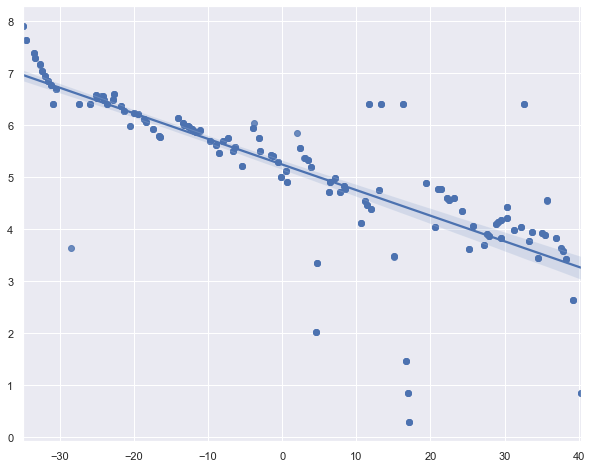

In [218]:
sns.regplot(x=X_transformed, y=np.log10(y))